# Importing libraries

All of the necessary libraries are importd to perform various functions upon the dataset

In [158]:
# linear algebra
import numpy as np 

#Import os
import os

# data processing
import pandas as pd

In [159]:
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [160]:
# Machine learning algorithms
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [161]:
# Library to split the dataset
from sklearn.model_selection import train_test_split

In [162]:
# Storing the titanic datset within a dataframe
# filename = 'titanic.csv'
filename = 'kaggle_train.csv'
# filename = 'kaggle_test.csv'

complete_df = pd.read_csv(os.path.join('..','..','data',filename))

# Data Analysis

Here the dataset is analysed to see what exactly it is made up of.

In [163]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
complete_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [165]:
complete_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Below is a graph depcting the survival rate of people according to their gender and their passenger class. It clearly indicates that females and people from higher classes were most likely to survive

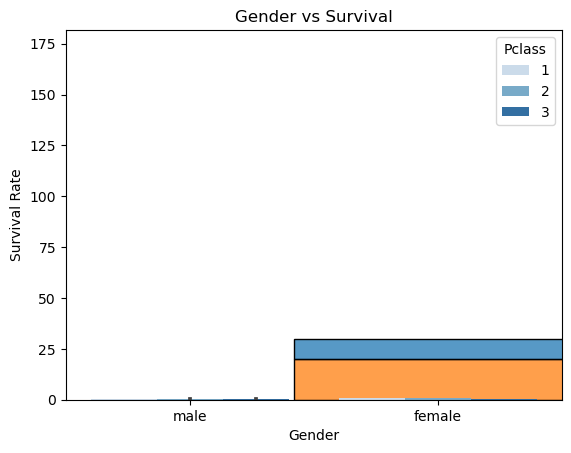

In [166]:

try:
    #Creating the bar plot grouped across classes
    sns.barplot(x = 'Sex',y = 'Survived',hue = 'Pclass',data = complete_df, palette = "Blues")
    #Adding the aesthetics
    plt.title('Gender vs Survival')
    plt.xlabel('Gender')
    plt.ylabel('Survival Rate') 
    # Show the plot
    plt.show()
except:
    print('Skipping')

# Managing the missing data

Showing the missing data within the data set

In [167]:
total = complete_df.isnull().sum().sort_values(ascending=False)
percent_1 = complete_df.isnull().sum()/complete_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


Removing unnecessary variables to simplify the data being used to generate the predictive model

In [168]:
# Removing the cabin feature as it contains too many missing variables
complete_df = complete_df.drop(['Cabin'], axis=1)
complete_df = complete_df.drop(['Ticket'], axis=1)

Deleting rows with empty variables. Also deleting row with fare missing since it is the only one.

In [169]:
complete_df[complete_df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [170]:
complete_df = complete_df.dropna(subset=['Fare'])
complete_df[complete_df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


Filling in the missing values for the embarked feature

In [171]:
complete_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [172]:
complete_df['Embarked'].fillna("S", inplace = True)

In [173]:
complete_df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

# Creating and altering features

Adding a feature to represent the title that each passenger possessed to help further differentiate passengers even within their passenger classes

In [174]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data = [complete_df]

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
complete_df = complete_df.drop(['Name'], axis=1)

Below is a graph depcting the title vs survival rate of the people with the different hues of red depicting the different passenger classes within each category

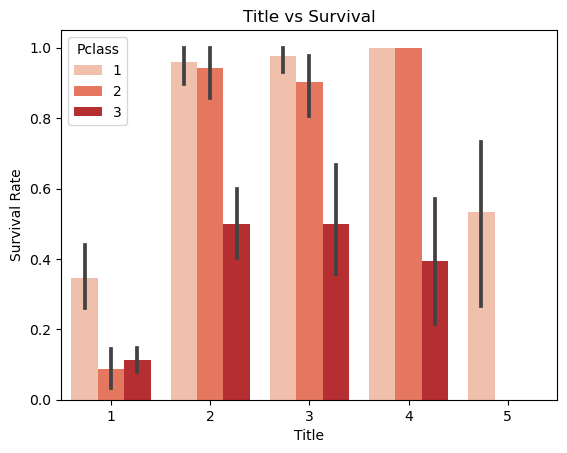

In [175]:
try:
    #Creating the bar plot grouped across classes
    sns.barplot(x = 'Title',y = 'Survived',hue = 'Pclass',data = complete_df, palette = "Reds")
    #Adding the aesthetics
    plt.title('Title vs Survival')
    plt.xlabel('Title')
    plt.ylabel('Survival Rate') 
    # Show the plot
    plt.show()

except:
    print('Skipping')

Filling in the missing age values by using the mean values for other people who have a similar passenger class, sex and title as them

In [176]:
complete_df['Age'].fillna(complete_df.groupby(['Pclass','Sex','Title'])['Age'].transform('mean'), inplace=True)

Graph representing the amount of people who survived from each age bracket when compared to those who did not survive

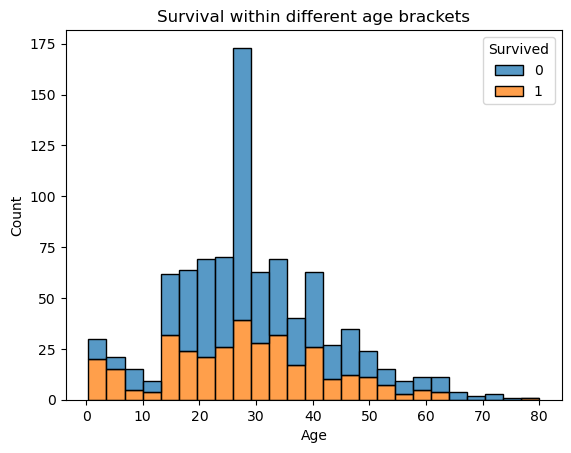

In [177]:
try:

    sns.histplot(data=complete_df, stat="count", multiple="stack",
                 x="Age", kde=False,
                 hue="Survived",
                 element="bars", legend=True)
    plt.title("Survival within different age brackets")
    plt.xlabel("Age")
    plt.ylabel("Count")

    plt.show()
except:
    print('Skipping')

Converting the chategorical features into numerical ones so that they may be accepted as input into the machine learning algorithms

In [178]:
genders = {"male": 0, "female": 1}

data = [complete_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

Changing float features to int

In [179]:
data = [complete_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Pclass'] = dataset['Pclass'].astype(int)
    dataset['Sex'] = dataset['Sex'].astype(int)
    dataset['Title'] = dataset['Title'].astype(int)
    dataset['SibSp'] = dataset['SibSp'].astype(int)
    dataset['Parch'] = dataset['Parch'].astype(int)
    
# Make age into speperate features
# Try to see if dropping fare will help
# Try to see which variables affect algorithm results

Performing One-hot encoding on class and embarked variables

In [180]:
#First perform the one hot encoding and then remove a single column
complete_df = pd.get_dummies(complete_df, columns = ['Pclass', 'Embarked'])

Dropping additional columns

In [181]:
complete_df = complete_df.drop(['Pclass_3'], axis=1)
complete_df = complete_df.drop(['Embarked_S'], axis=1)

In [182]:
complete_df.head(8)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Embarked_C,Embarked_Q
0,1,0,0,22.000000,1,0,7,1,0,0,0,0
1,2,1,1,38.000000,1,0,71,3,1,0,1,0
2,3,1,1,26.000000,0,0,7,2,0,0,0,0
3,4,1,1,35.000000,1,0,53,3,1,0,0,0
4,5,0,0,35.000000,0,0,8,1,0,0,0,0
5,6,0,0,28.724891,0,0,8,1,0,0,0,1
6,7,0,0,54.000000,0,0,51,1,1,0,0,0
7,8,0,0,2.000000,3,1,21,4,0,0,0,0


Saving the data

In [183]:
# complete_df.to_csv(os.path.join('..','..',"data",'Variant 2',"titanic_cleaned.csv"),index=False)
complete_df.to_csv(os.path.join('..','..',"data",'Variant 2',"kaggle_train_cleaned.csv"),index=False)
# complete_df.to_csv(os.path.join('..','..',"data",'Variant 2',"kaggle_test_cleaned.csv"),index=False)